
# Proyecto: Reconocimiento de Números y Operadores Matemáticos

Estos notebooks desarrollan un sistema interactivo en **Streamlit** para el reconocimiento de números y operadores matemáticos, utilizando modelos de clasificación como **Regresión Logística, k-Vecinos y SVM**.

## Pasos desarrollados:

### 1. Importación de Librerías
Se cargan las bibliotecas necesarias para procesamiento de imágenes, modelos de aprendizaje automático y visualización.

### 2. Creación del Dataset
Se genera un dataset de imágenes con los números del **0 al 9** y operadores **(+, -, ×, /)**.

### 3. Preprocesamiento de Datos
Se convierten las imágenes a escala de grises y se normalizan para mejorar el rendimiento de los modelos.

### 4. Entrenamiento de Modelos de Clasificación
Se comparan los siguientes modelos:
- **Regresión Logística**
- **k-Vecinos Cercanos (k-NN)**
- **Máquinas de Soporte Vectorial (SVM)**

El modelo con mejor rendimiento es seleccionado para su uso en la aplicación.

### 5. Desarrollo de la Aplicación en Streamlit
Se crea una interfaz gráfica donde los usuarios pueden dibujar números y operadores, y la aplicación reconocerá los símbolos, ejecutará la operación matemática y mostrará el resultado.

### 6. Pruebas y Evaluación
Se realizan pruebas para verificar la precisión del modelo en la clasificación y la correcta ejecución de las operaciones matemáticas.



# __Tarea 2:__ 

1. Nombre: Juan Luis   
1. Apellido: Fernández Abreu
1. Correo: juuanfz@gmail.com

Se dividirá en 2 Notebooks: Notebook1_Num para el dataset de MNIST y Notebook2_Op para el dataset propio de operadores

# Comparación de Modelos de Clasificación para Números (0-9) en MNIST
En este notebook, vamos a comparar tres modelos de clasificación:
- **Regresión Logística**
- **k-Vecinos Cercanos (KNN)**
- **Máquinas de Soporte Vectorial (SVM)**

Utilizaremos el conjunto de datos **MNIST**, que contiene imágenes de dígitos escritos a mano.

In [11]:
# 1️ Importación de librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.datasets import mnist  # type: ignore

# Establecer SEED para reproducibilidad
SEED = 28447019
np.random.seed(SEED)

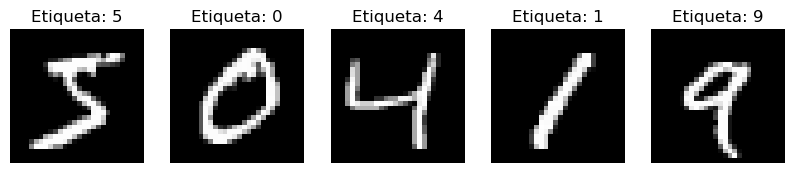

In [12]:
# 2️ Cargar y visualizar el conjunto de datos MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalización de los píxeles (de 0-255 a 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Mostrar algunas imágenes de ejemplo
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Etiqueta: {y_train[i]}")
    ax.axis('off')
plt.show()

In [13]:
# 3️ Preprocesamiento de datos
# Aplanar imágenes de 28x28 a vectores de 784 píxeles
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Dividir en entrenamiento y validación (80% - 20%)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_flat, y_train, test_size=0.2, random_state=SEED
)

# Aplicar StandardScaler después de dividir los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_split = scaler.fit_transform(X_train_split)
X_val_split = scaler.transform(X_val_split)
X_test_flat = scaler.transform(X_test_flat)  # También escalar el conjunto de prueba

print(f"Tamaño del conjunto de entrenamiento: {len(X_train_split)}")
print(f"Tamaño del conjunto de validación: {len(X_val_split)}")
print(f"Tamaño del conjunto de prueba: {len(X_test_flat)}")


Tamaño del conjunto de entrenamiento: 48000
Tamaño del conjunto de validación: 12000
Tamaño del conjunto de prueba: 10000



###  Pruebas y Evaluación

Para medir el rendimiento de los modelos entrenados, se utilizaron las siguientes métricas:

- **Accuracy**: Porcentaje de predicciones correctas sobre el total.
- **Precision**: Proporción de predicciones positivas correctas.
- **Recall**: Proporción de casos positivos correctamente identificados.
- **F1-score**: Media armónica entre precisión y recall, útil en datasets desbalanceados.

El proceso de evaluación consistió en:

1. Entrenar cada modelo con el conjunto de datos.
2. Realizar predicciones sobre un conjunto de validación.
3. Calcular las métricas mencionadas.
4. Determinar el mejor modelo basado en el puntaje promedio.

El modelo con mejor desempeño se selecciona para su uso en la aplicación.


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Diccionario para almacenar los resultados
results = {}

# 4 Entrenamiento de Modelos
models = {
    "Regresión Logística": LogisticRegression(max_iter=500, random_state=SEED),
    "k-Vecinos": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', random_state=SEED)
}


for name, model in models.items():
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict(X_val_split)
    
    accuracy = accuracy_score(y_val_split, y_pred) * 100
    precision = precision_score(y_val_split, y_pred, average='macro') * 100
    recall = recall_score(y_val_split, y_pred, average='macro') * 100
    f1 = f1_score(y_val_split, y_pred, average='macro') * 100

    results[name] = [accuracy, precision, recall, f1]



In [15]:
# Calcular el promedio de cada métrica para determinar el mejor modelo
average_scores = {name: np.mean(metrics) for name, metrics in results.items()}

# Encontrar el mejor modelo basado en el puntaje promedio
best_model = max(average_scores, key=average_scores.get)

print("\n🏆 Mejor modelo general:", best_model)
print("Puntaje promedio de métricas: {:.2f}%".format(average_scores[best_model]))




🏆 Mejor modelo general: k-Vecinos
Puntaje promedio de métricas: 94.55%


In [16]:
# Convertir los resultados en un DataFrame para una mejor visualización
df_results = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1 Score"]).T

# Mostrar la tabla de comparación
print("\n Comparación de métricas (%) entre modelos:")
display(df_results)




 Comparación de métricas (%) entre modelos:


,Accuracy,Precision,Recall,F1 Score
Regresión Logística,91.600000,91.453374,91.443731,91.444504
k-Vecinos,94.591667,94.601532,94.481406,94.513767
SVM,92.141667,92.031757,92.014594,91.992188


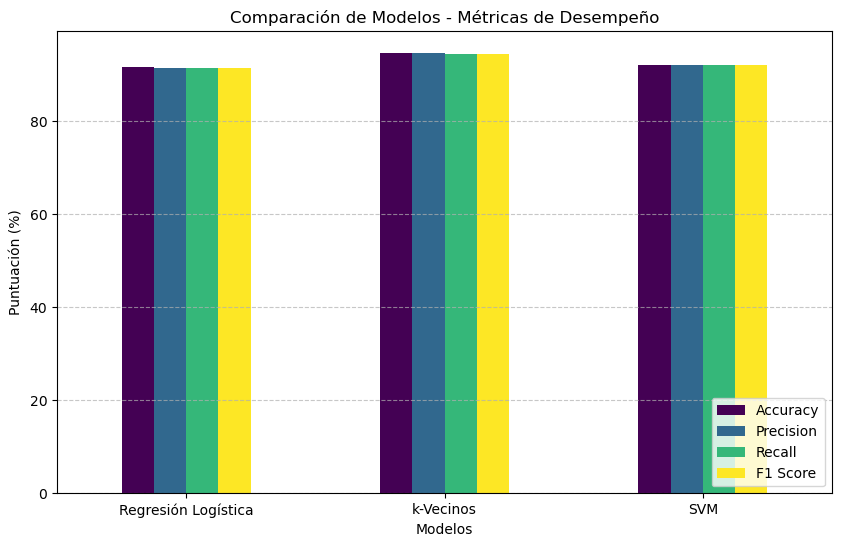

In [17]:
# Gráfico de barras para comparar los modelos
df_results.plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Comparación de Modelos - Métricas de Desempeño")
plt.ylabel("Puntuación (%)")
plt.xlabel("Modelos")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


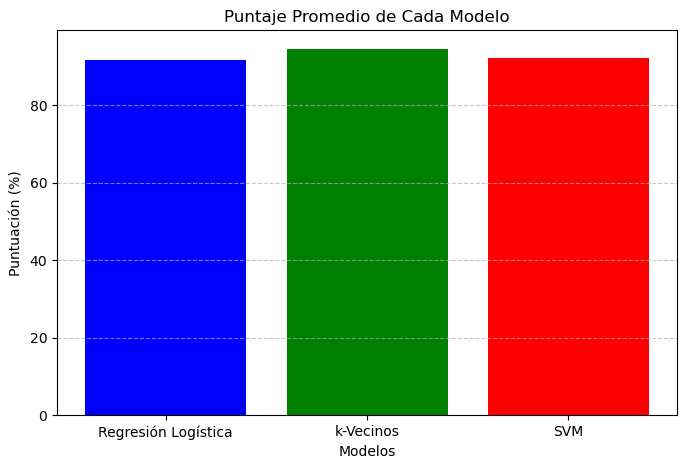

In [18]:

# Gráfico de barras para la comparación del puntaje promedio
plt.figure(figsize=(8, 5))
plt.bar(average_scores.keys(), average_scores.values(), color=["blue", "green", "red"])
plt.title("Puntaje Promedio de Cada Modelo")
plt.ylabel("Puntuación (%)")
plt.xlabel("Modelos")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Importaremos el mejor modelo en base a la métrica Accuracy

[0] = Accuracy, [1] Precision, [2] = Recall y [3] = F1-Score

In [19]:
import joblib
import os

carpeta_destino = "../notebooks" 

# Seleccionar el mejor modelo
best_model_name = max(results, key=lambda k: results[k][0])  # Basado en Accuracy
best_model = models[best_model_name]

# Guardar el modelo en la carpeta especificada
ruta_guardado = os.path.join(carpeta_destino, "mejor_modelo_numeros.joblib")
joblib.dump(best_model, ruta_guardado)
print(f"Modelo guardado en: {ruta_guardado}")


Modelo guardado en: ../notebooks/mejor_modelo_numeros.joblib
